This code gives an introduction to unsupervised learning by solving a clustering problem using **K-Means Clustering** following [this tutorial](https://youtu.be/EItlUEPCIzM).

Replace 'XLABEL' and 'YLABEL' with the respective labels in your data set.

# Problem description
Enter in the text cell below the clustering problem that you're about to work on. 

What is your X and Y label?

Import packages

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
# import seaborn for color themes
import seaborn as sns
%matplotlib inline


Import and explore the data set

In [3]:
df = pd.read_csv('originalfile.csv')
#sets color theme to colorblinf friendly setting
sns.set_palette("colorblind")

2. Display columns and describe the data set

In [4]:
df.describe()

,Overall_rank,Region_Number,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,62.448718,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,60.648144,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,5.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,14.000000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,34.000000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,145.000000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,155.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Scatter plot

Text(0, 0.5, 'Happiness Score')

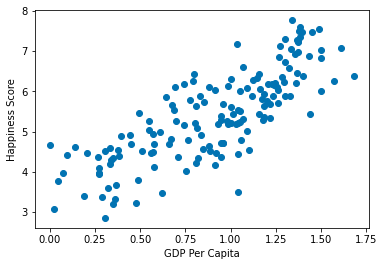

In [6]:
plt.scatter(df.GDP_per_capita,df['Score'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Happiness Score')

Fit and predict three clusters for the data

In [7]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['GDP_per_capita','Score']])
y_predicted

array([1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0,
       0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1,
       2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1,
       1, 1], dtype=int32)

In [8]:
df['cluster']=y_predicted
df.head()

,Overall_rank,Country_or_region,Region_Number,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,cluster
0,154,Afghanistan,34,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1
1,107,Albania,39,4.719,0.947,0.848,0.874,0.383,0.178,0.027,1
2,88,Algeria,15,5.211,1.002,1.160,0.785,0.086,0.073,0.114,2
3,47,Argentina,5,6.086,1.092,1.432,0.881,0.471,0.066,0.050,2
4,116,Armenia,145,4.559,0.850,1.055,0.815,0.283,0.095,0.064,1


In [9]:
km.cluster_centers_

array([[1.36553571, 7.04596429],
       [0.53678333, 4.26911667],
       [1.04060294, 5.73636765]])

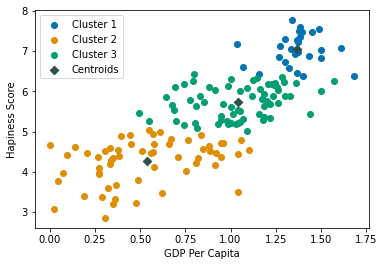

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.GDP_per_capita,df1['Score'],label = "Cluster 1")
plt.scatter(df2.GDP_per_capita,df2['Score'],label = "Cluster 2")
plt.scatter(df3.GDP_per_capita,df3['Score'],label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='darkslategrey',marker='D',label='Centroids')
plt.xlabel('GDP Per Capita')
plt.ylabel('Hapiness Score')
plt.legend()

Fit the model using MinMaxScaler()

In [12]:
scaler = MinMaxScaler()

scaler.fit(df[['Score']])
df['Score'] = scaler.transform(df[['Score']])

scaler.fit(df[['GDP_per_capita']])
df['GDP_per_capita'] = scaler.transform(df[['GDP_per_capita']])

Text(0, 0.5, 'Happiness Score')

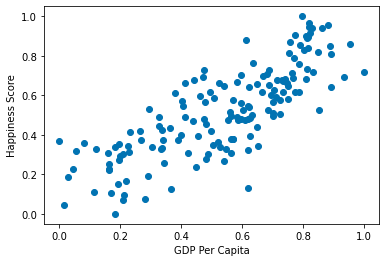

In [13]:
plt.scatter(df.GDP_per_capita,df['Score'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Happiness Score')

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['GDP_per_capita','Score']])
y_predicted

array([1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1,
       2, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1,
       0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1,
       1, 1], dtype=int32)

In [15]:
df['cluster']=y_predicted
df.head()

,Overall_rank,Country_or_region,Region_Number,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,cluster
0,154,Afghanistan,34,0.071196,0.207838,0.517,0.361,0.000,0.158,0.025,1
1,107,Albania,39,0.379577,0.562352,0.848,0.874,0.383,0.178,0.027,2
2,88,Algeria,15,0.479658,0.595012,1.160,0.785,0.086,0.073,0.114,2
3,47,Argentina,5,0.657648,0.648456,1.432,0.881,0.471,0.066,0.050,0
4,116,Armenia,145,0.347030,0.504751,1.055,0.815,0.283,0.095,0.064,2


In [16]:
km.cluster_centers_

array([[0.76997125, 0.74718784],
       [0.19703418, 0.24972878],
       [0.521717  , 0.46776964]])

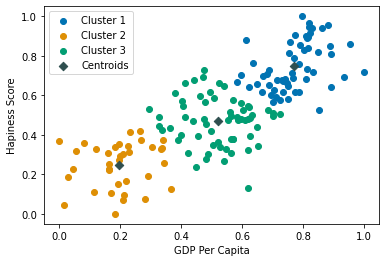

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.GDP_per_capita,df1['Score'],label = "Cluster 1")
plt.scatter(df2.GDP_per_capita,df2['Score'],label = "Cluster 2")
plt.scatter(df3.GDP_per_capita,df3['Score'],label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='darkslategrey',marker='D',label='Centroids')
plt.xlabel('GDP Per Capita')
plt.ylabel('Hapiness Score')
plt.legend()

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['GDP_per_capita','Score']])
    sse.append(km.inertia_)

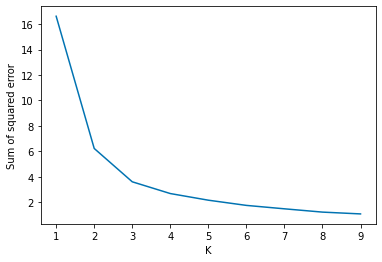

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)